# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**
Q1-3 attached as image in repo.

4. Yes, the non-decreasing transformation keeps the order of the data. For example, if variable "y" were in the middle, then variable "g(y)" would still be in the middle. This applies for any quantile. It does not apply to the range or IQR. It does not apply to Range or IQR because the range is the distance between the max and min, and these values would be different.
5. No, it is not always true.

**



**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

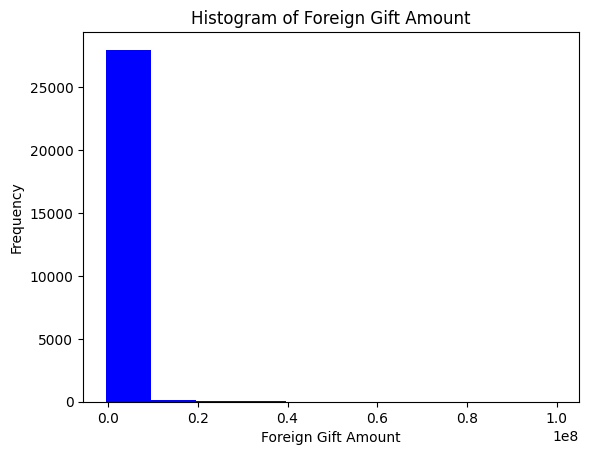

2. Findings: Upon making the histogram, we see that the data has a large spread.
We see that it ranges from lows of 1000 to up to 1e8!


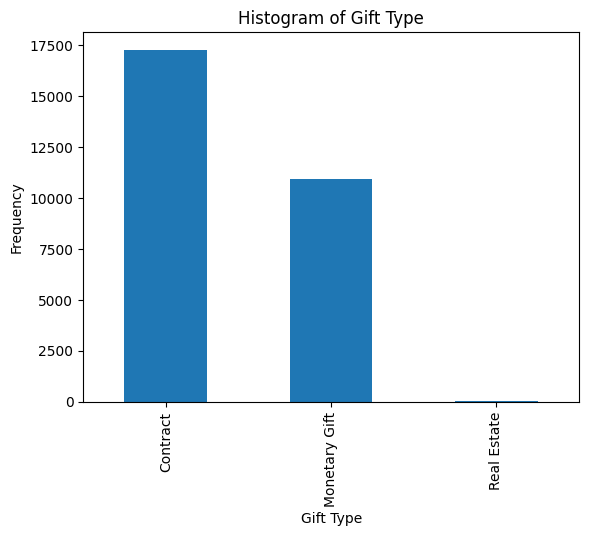

Proportions of Gift Types:
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: count, dtype: float64


C:\Users\aaron\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


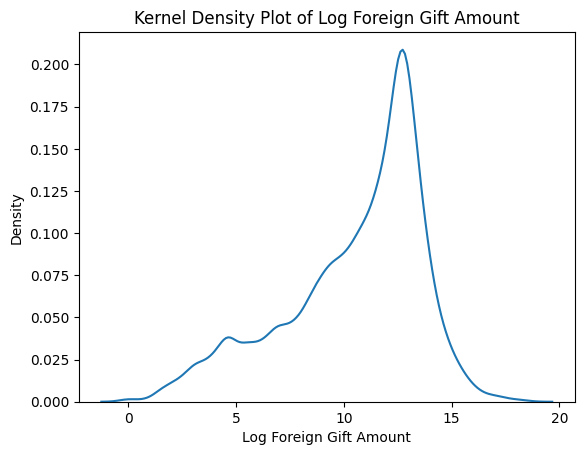

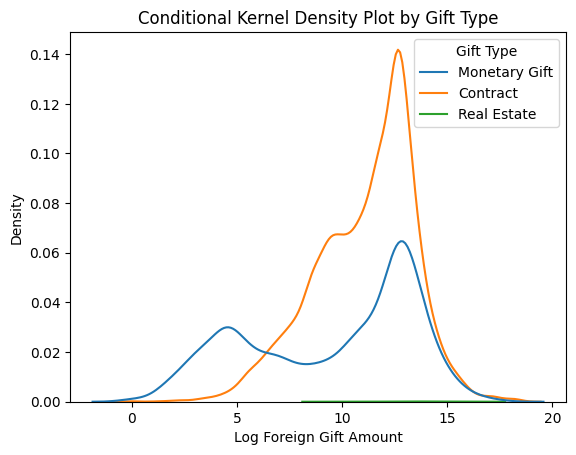

We can see that the different gift types have different distributions, and especially that the Contract type has the highest amount


Top 15 Countries by Number of Gifts:
Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64


Top 15 Countries by Amount Given:
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY              

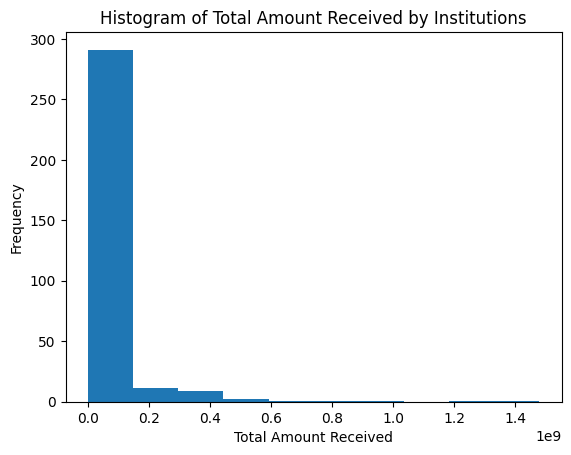



Top Giftors by Total Amount Given:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


We see that Qatar provides the top amount of gifts


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#1 - load dataset
url = "./data/ForeignGifts_edu.csv"
df = pd.read_csv(url)

# 2 - create histogram of `Foreign Gift Amount`
plt.hist(df['Foreign Gift Amount'], color='blue')
plt.title('Histogram of Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.show()

# 2 - FINDINGS
print("2. Findings: Upon making the histogram, we see that the data has a large spread.")
print("We see that it ranges from lows of 1000 to up to 1e8!")

# 3 - Create a histogram for `Gift Type`
gift_type_counts = df['Gift Type'].value_counts()
gift_type_counts.plot(kind='bar')
plt.title('Histogram of Gift Type')
plt.xlabel('Gift Type')
plt.ylabel('Frequency')
plt.show()

# Calculate proportions of gift types
gift_type_proportions = gift_type_counts / gift_type_counts.sum()
print("Proportions of Gift Types:")
print(gift_type_proportions)

# 4 - Kernel Density Plot of Log Foreign Gift Amount
df['Log Foreign Gift Amount'] = np.log(df['Foreign Gift Amount'])
sns.kdeplot(df['Log Foreign Gift Amount'])
plt.title('Kernel Density Plot of Log Foreign Gift Amount')
plt.xlabel('Log Foreign Gift Amount')
plt.ylabel('Density')
plt.show()

# 4 - Kernel density plot of Log Foreign by Gift Type
sns.kdeplot(data=df, x='Log Foreign Gift Amount', hue='Gift Type')
plt.title('Conditional Kernel Density Plot by Gift Type')
plt.xlabel('Log Foreign Gift Amount')
plt.ylabel('Density')
plt.show()

print("We can see that the different gift types have different distributions, and especially that the Contract type has the highest amount")
print("\n")
# 5 - Top 15 countries by number of gifts 
top_countries_by_gifts = df['Country of Giftor'].value_counts().head(15)
print("Top 15 Countries by Number of Gifts:")
print(top_countries_by_gifts)

print("\n")
# 5 - Top 15 countries by amount given
top_countries_by_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().nlargest(15)
print("Top 15 Countries by Amount Given:")
print(top_countries_by_amount)

print("\n")
# 6 - Top 15 institutions by total amount received
top_institutions = df.groupby('Institution Name')['Foreign Gift Amount'].sum().nlargest(15)
print("Top 15 Institutions by Total Amount Received:")
print(top_institutions)

print("\n")
# 6 - Histogram of total amount received
total_amount_by_institution = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
plt.hist(total_amount_by_institution)
plt.title('Histogram of Total Amount Received by Institutions')
plt.xlabel('Total Amount Received')
plt.ylabel('Frequency')
plt.show()

print("\n")
# 7 - Calculate Top Giftors
top_giftors = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().nlargest(15)
print("Top Giftors by Total Amount Given:")
print(top_giftors)
print("\n")
print("We see that Qatar provides the top amount of gifts")

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

Dimensions:  (30478, 13)

The dataset has 30478 observations and 13 variables.
    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square Loft      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0     Apartment                         NaN  Entire home/apt  11249.0   1.0   
1     Apartment                         NaN     Private room  11206.0   1.0   
2     Apartment                         NaN     Private room  10032.0   1.0   
3     Apartment                         NaN  Entire home/apt  10024.0   3.0   
4     Apartment                        95.0     Private room  1

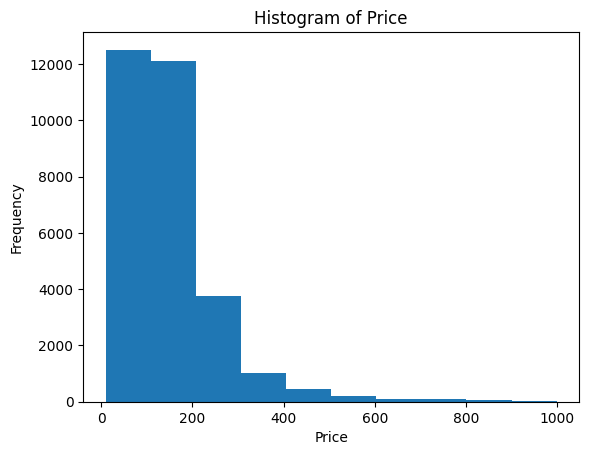

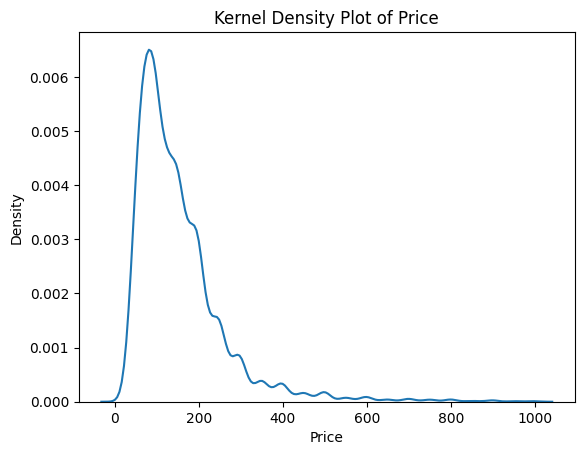

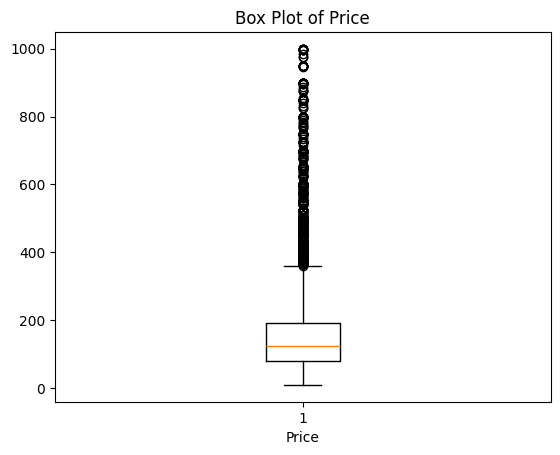

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


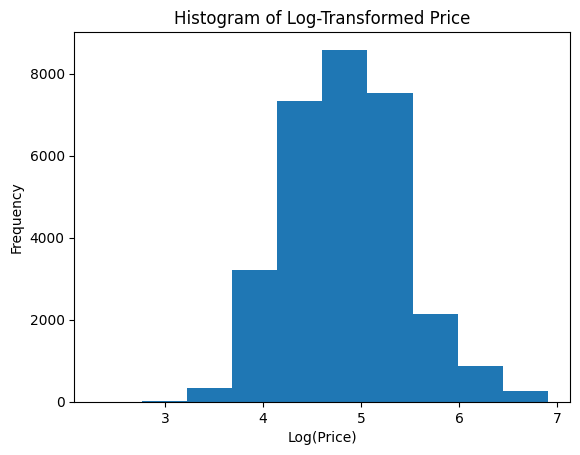

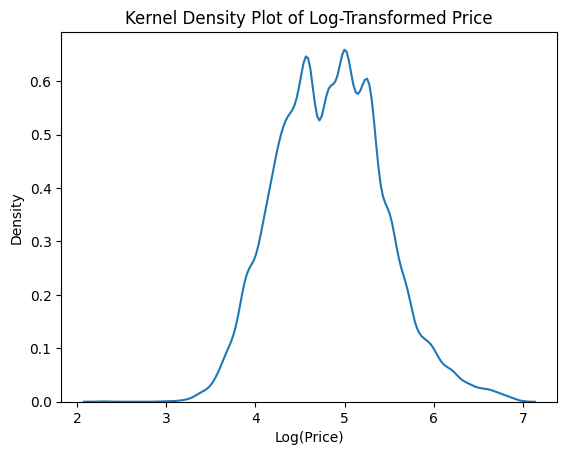

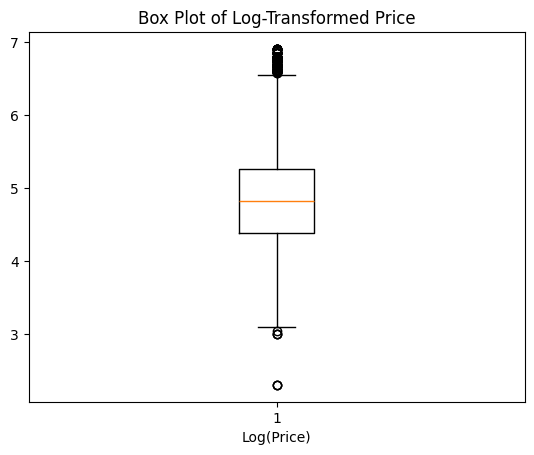

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64
The data seems to skewed to the right, where a lot of the values tend to be concentrated in the lower half (below 300)
There does seem to be a bit of outliers which can be seen  from the histogram and kernel density plot.
Using the log scale definitely helped with these issues.


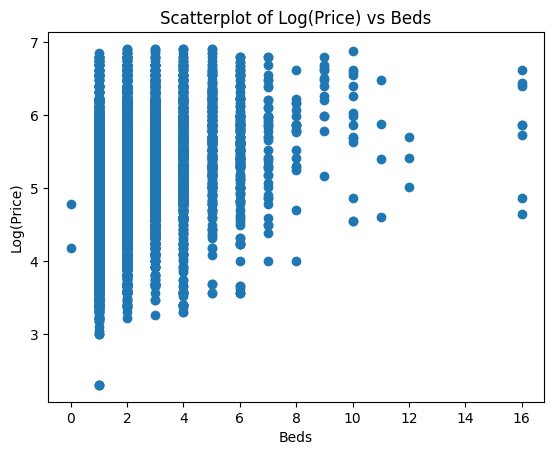

            mean         std
Beds                        
0.0    92.000000   38.183766
1.0   124.757670   75.685752
2.0   186.702332  115.044205
3.0   234.928043  142.288189
4.0   280.554830  175.512312
5.0   322.000000  190.319415
6.0   316.313253  201.157585
7.0   341.377778  220.116631
8.0   331.850000  155.652202
9.0   587.142857  208.351721
10.0  442.200000  263.926992
11.0  332.250000  236.798613
12.0  225.000000   75.000000
16.0  402.250000  235.093143
We see from the data that the average price seems to increase as the number of beds increases. We also see that the standard deviation increases with the number of beds too.




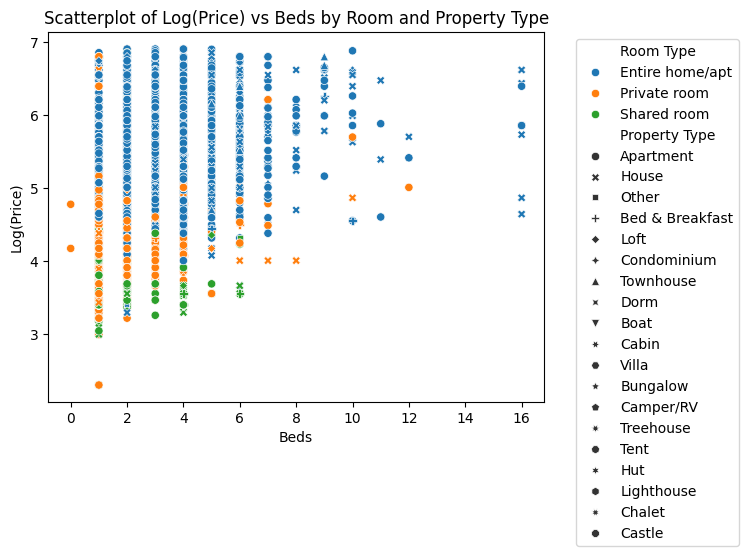

                                       mean         std
Room Type       Property Type                          
Entire home/apt Apartment        200.210161  109.967435
                Bed & Breakfast  184.538462  119.814172
                Boat             158.428571   51.110524
                Bungalow         150.750000   46.464144
                Cabin            250.000000         NaN
                Camper/RV        114.333333  107.685963
                Condominium      281.126761  175.313998
                Dorm              44.250000   24.060687
                House            234.554633  159.785974
                Lighthouse        39.000000         NaN
                Loft             284.910290  184.515517
                Other            290.800000  273.526273
                Townhouse        242.037037  166.755243
                Villa            206.333333   89.667906
Private room    Apartment         91.605903   46.356168
                Bed & Breakfast   97.161290   47

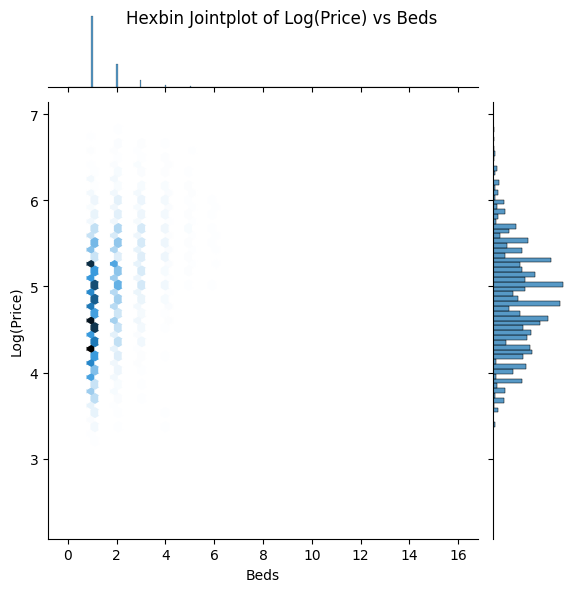

Looking at the graph, we see that there is more concentrated around the lower end. It also shows that the majority of the listings are from smaller properties.
Due to the concentration being around the lower end of the data, we see this being relevant in graphs by seeing that most of the lower priced variables are more reliable for accurate data representation


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1 - load dataset
airbnb_data = pd.read_csv('./data/airbnb_hw.csv')

# 2 - determine dimensions and observations/columns/variables
print('Dimensions: ', airbnb_data.shape)
print("\nThe dataset has", airbnb_data.shape[0], "observations and", airbnb_data.shape[1], "variables.")
print(airbnb_data.head())

# 3 - cross-tabulate Room Type and Property Type
room_property_crosstab = pd.crosstab(airbnb_data['Room Type'], airbnb_data['Property Type'])
print('Cross-Tabulated: \n', room_property_crosstab)

print("Patterns that I see are that most of the listings are Entire homes/apartments or private rooms. There are less shared rooms overall.")
print("For bed and breakfast, House, Dorm, etc. they are the most common for getting private rooms.")

# turn price to numeric and remove NA (caused errors)
airbnb_data['Price'] = pd.to_numeric(airbnb_data['Price'], errors='coerce')
airbnb_data = airbnb_data.dropna(subset=['Price'])

# 4 - make histogram
plt.hist(airbnb_data['Price'])
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# 4 - make kernel density plot
sns.kdeplot(airbnb_data['Price'])
plt.title('Kernel Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# 4 - make box plot
plt.boxplot(airbnb_data['Price'])
plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.show()

# 4 - statistical description of variable
print(airbnb_data['Price'].describe())

# 4 - transform to log scale
airbnb_data['price_log'] = np.log(airbnb_data['Price'])
plt.hist(airbnb_data['price_log'])
plt.title('Histogram of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')
plt.show()

sns.kdeplot(airbnb_data['price_log'])
plt.title('Kernel Density Plot of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.ylabel('Density')
plt.show()

plt.boxplot(airbnb_data['price_log'])
plt.title('Box Plot of Log-Transformed Price')
plt.xlabel('Log(Price)')
plt.show()

print(airbnb_data['price_log'].describe())

print("The data seems to skewed to the right, where a lot of the values tend to be concentrated in the lower half (below 300)")
print("There does seem to be a bit of outliers which can be seen  from the histogram and kernel density plot.")
print("Using the log scale definitely helped with these issues.")

# 5 - create scatterplot of price_log and Beds
plt.scatter(airbnb_data['Beds'], airbnb_data['price_log'])
plt.title('Scatterplot of Log(Price) vs Beds')
plt.xlabel('Beds')
plt.ylabel('Log(Price)')
plt.show()

grouped_beds = airbnb_data.groupby('Beds')['Price'].agg(['mean', 'std'])
print(grouped_beds)

print("We see from the data that the average price seems to increase as the number of beds increases. We also see that the standard deviation increases with the number of beds too.")
print("\n")

# 6 - create scatterplot with Room Type and Property Type
sns.scatterplot(data=airbnb_data, x='Beds', y='price_log', hue='Room Type', style='Property Type')
plt.title('Scatterplot of Log(Price) vs Beds by Room and Property Type')
plt.xlabel('Beds')
plt.ylabel('Log(Price)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

grouped_room_property = airbnb_data.groupby(['Room Type', 'Property Type'])['Price'].agg(['mean', 'std'])
print(grouped_room_property)

print("We can see from the data that the highest price on average with room type and property type is the entire home/apt section")
print("The highest standard deviation is also the entire home/apt section.")
print("The median is more reliable than the mean for this due to the high variability and outliers of the data")

# 7 - Jointplot with kind=hex
sns.jointplot(data=airbnb_data, x='Beds', y='price_log', kind='hex')
plt.suptitle('Hexbin Jointplot of Log(Price) vs Beds')
plt.xlabel('Beds')
plt.ylabel('Log(Price)')
plt.show()

print("Looking at the graph, we see that there is more concentrated around the lower end. It also shows that the majority of the listings are from smaller properties.")
print("Due to the concentration being around the lower end of the data, we see this being relevant in graphs by seeing that most of the lower priced variables are more reliable for accurate data representation")

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

Dimensions:  (623, 10)

The dataset has 623 observations and 10 variables.
Month                                                                                            str
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                   int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                  int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                       str
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                     str
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)       str
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)      str
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)         str
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                     int64
Active Well Serv

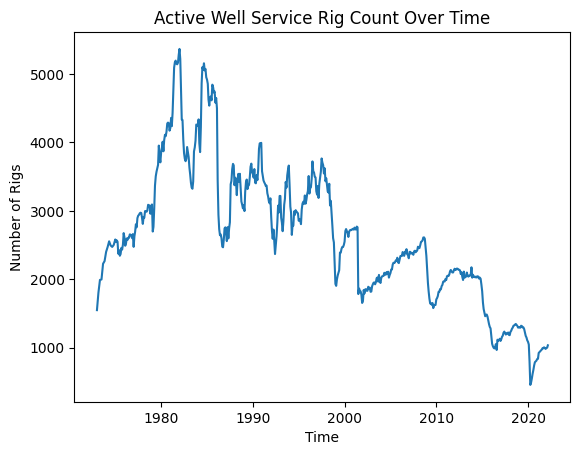

We can see that the active well service rig count USUALLY decreases over time. There is a lot of variance.


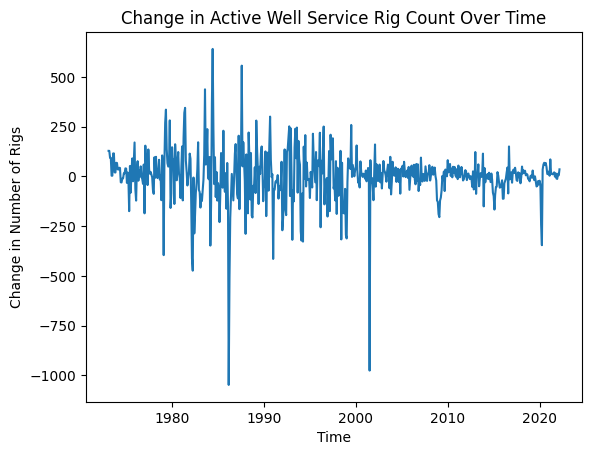

Doing this shows the variance from the change in number of rigs better. We see the variance across the years. We see that the overall change decreases over time.


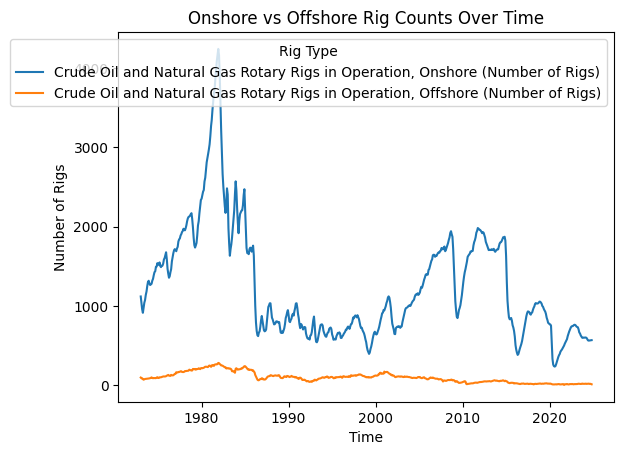

In [50]:
# 1 - load dataset
drilling_data = pd.read_csv('./data/drilling_rigs.csv')
print('Dimensions: ', drilling_data.shape)
print("\nThe dataset has", drilling_data.shape[0], "observations and", drilling_data.shape[1], "variables.")

print(drilling_data.dtypes)
print("Some variables need to be typecasted. These ones being mainly Month, and the other rigs where they are number of rigs and are strings")

# 2 - Convert Month to datetime variable
drilling_data['time'] = pd.to_datetime(drilling_data['Month'], format='mixed')

# Convert the active well service to numeric
drilling_data['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(drilling_data['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')

# 3 - Line plot of Active Well Service Rig Count over time
plt.plot(drilling_data['time'], drilling_data['Active Well Service Rig Count (Number of Rigs)'])
plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.show()

print("We can see that the active well service rig count USUALLY decreases over time. There is a lot of variance.")

# 4 - First difference of Active Well Service Rig Count plotted over time
drilling_data['Rig Count Change'] = drilling_data['Active Well Service Rig Count (Number of Rigs)'].diff()
plt.plot(drilling_data['time'], drilling_data['Rig Count Change'])
plt.title('Change in Active Well Service Rig Count Over Time')
plt.xlabel('Time')
plt.ylabel('Change in Number of Rigs')
plt.show()
print("Doing this shows the variance from the change in number of rigs better. We see the variance across the years. We see that the overall change decreases over time.")

# 5 - Melt onshore and offshore rig counts and plot the resulting series
melted_data = drilling_data.melt(id_vars=['time'], value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'], var_name='Rig Type', value_name='Rig Count')
sns.lineplot(data=melted_data, x='time', y='Rig Count', hue='Rig Type')
plt.title('Onshore vs Offshore Rig Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Rigs')
plt.legend(title='Rig Type')
plt.show()